In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph

In [62]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 100
numMsg = 10000
myseed = 67
maxEpochs = 10000
msgCost = costFactor*msgUtility

In [63]:
prevStates = []
maxEpochs = 1
commonAttrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2,"gamma":1}

attr = "gamma"
attrRange = np.arange(0,1.1,0.1)
# attrRange = np.arange(5*msgCost, 50*msgCost, 5)
# attrRange = ["Utilitarian","Deontology", "Virtue", "Transcendence"]
outcomeNetwork = {}

for val in attrRange:
    if attr == "type":
        type = val
    else:
        commonAttrs[attr] = val
    network = populationGraph(numNodes,[1],[transcendenceAgent], commonAttrs)
    e = 0
    while e<maxEpochs:
        e+=1
        G = network.getGraph()
        msgList = network.createMsgs(numMsg)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
        nf, nd = network.transmitMsgs()
        for i in range(numNodes) : G.nodes[i]['agent'].epochUpdate()
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
        if np.count_nonzero(curStable) == numNodes:
            break
    outcomeNetwork[val] = copy.deepcopy(network)

0.0
0.41
0.51
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55


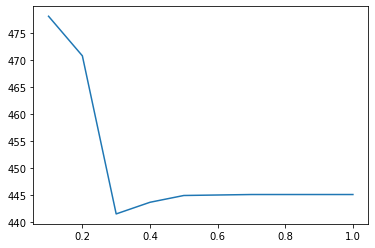

In [66]:
resilienceVal = [outcomeNetwork[val].getResilience() for val in attrRange]
plt.plot(attrRange[1:], resilienceVal[1:])

In [43]:
utility_list = plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar", metric="mean")
print(utility_list)

AttributeError: 'populationGraph' object has no attribute 'nodes'

[19.6, 18.58, 19.23, 19.6]


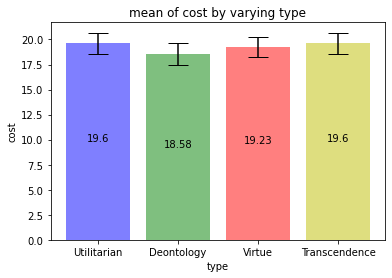

In [ ]:
costList = plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar", metric="mean")
print(costList)

[40, 32, 36, 40]


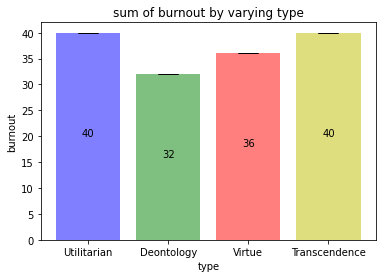

In [ ]:
burnoutList = plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar", metric="sum")
print(burnoutList)

[9.6, 8.58, 9.23, 9.6]


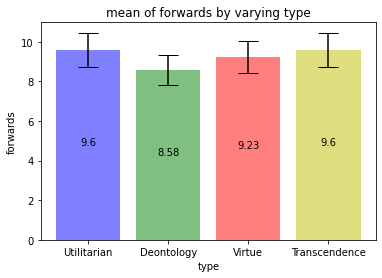

In [ ]:
forwardsList = plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar", metric="mean")
print(forwardsList)

[0.4, 1.42, 0.77, 0.4]


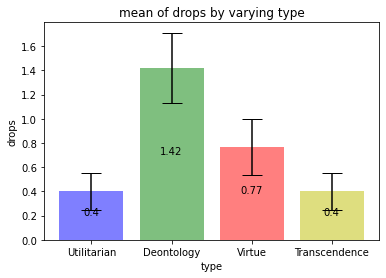

In [ ]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar", metric="mean")
print(dropsList)

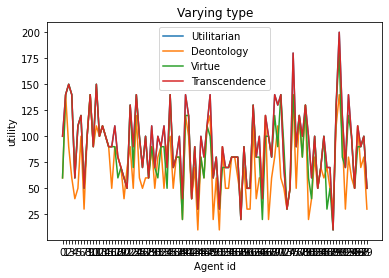

In [ ]:
plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


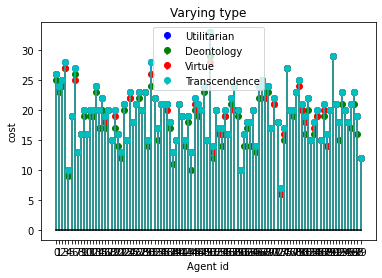

In [ ]:
plotAgentWiseVaryParams(outcomeNetwork, "cost", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


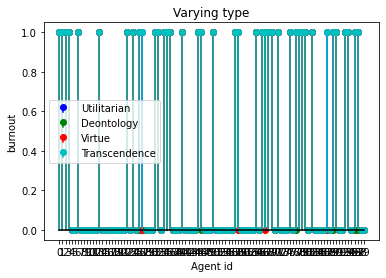

In [ ]:
plotAgentWiseVaryParams(outcomeNetwork, "burnout", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:92: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


[9200, 7160, 8460, 9200]

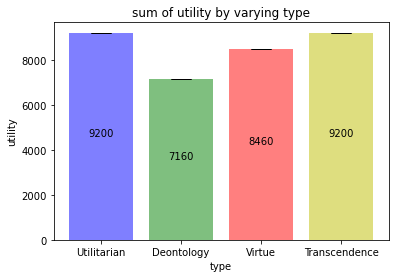

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")

[1960.0, 1858.0, 1923.0, 1960.0]

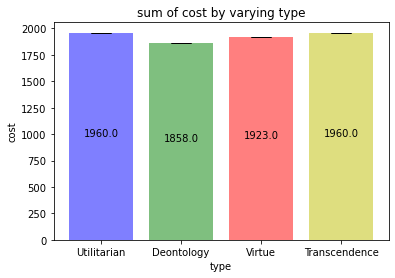

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar")

[40, 32, 36, 40]

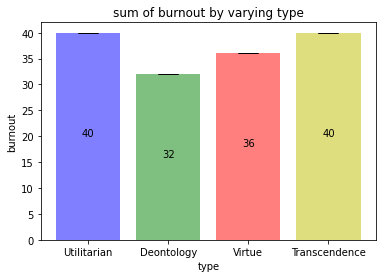

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar")

[960, 858, 923, 960]

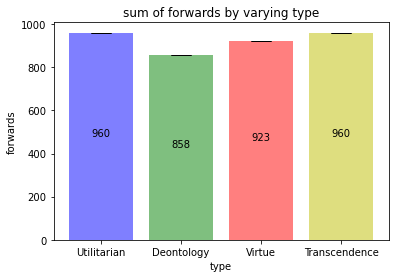

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar")

[40, 142, 77, 40]

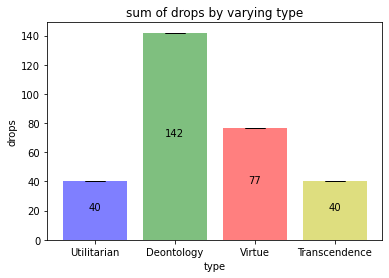

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar")

In [ ]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

1
20.0


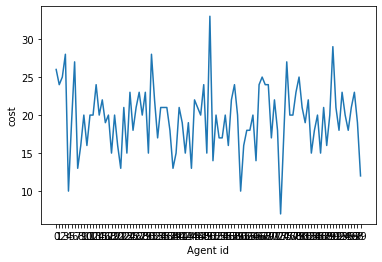

In [ ]:
plotAgentwiseProp(G, "cost")

In [ ]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


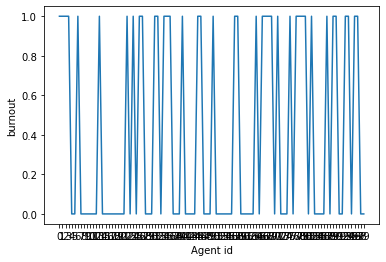

In [ ]:
plotAgentwiseProp(G, "burnout")

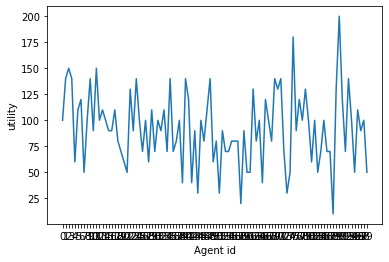

In [ ]:
plotAgentwiseProp(G, "utility")